In [2]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [ ]:
####################  1. Regression with Daily Return   ###################################

In [3]:
pf_size = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [4]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [5]:
pf_size_excess=(pf_size.iloc[:,1:pf_size.shape[1]]).sub(ff5.RF,axis=0)
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712  


In [6]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10       YYMM  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692 1963-07-01  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878 1963-07-02  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638 1963-07-03  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458 1963-07-05  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712 1963-07-08  


In [7]:
print(ff5.head())

        YYMM  Mkt-RF   SMB   HML   RMW   CMA     RF
0 1963-07-01   -0.67  0.00 -0.32 -0.01  0.15  0.012
1 1963-07-02    0.79 -0.27  0.27 -0.07 -0.19  0.012
2 1963-07-03    0.63 -0.17 -0.09  0.17 -0.33  0.012
3 1963-07-05    0.40  0.08 -0.28  0.08 -0.33  0.012
4 1963-07-08   -0.63  0.04 -0.18 -0.29  0.13  0.012


In [8]:
ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)
# pf_size_excess = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]

In [9]:
start = ff5.index[0]
end = ff5.index[ff5.shape[0]-1]
n_day = end - start
print(n_day.days)
print(ff5.shape[0])
#because there are weekends and public holidays, we use every 126 records as a proxy of every 6-month window\n",
#There are in total 14075 records, thus will have 14075 - 126 + 1 =  13950 windows\n",
window = 126
n_window = ff5.shape[0] - 126 + 1
print(n_window)

20423
14075
13950


In [10]:
#To run OLS on a 6-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 13950 models are for the portfolio Lo 30,\n",
#the next 13950 models are for the portfolio Med 40\n",
pf_3 = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf = []
for i in range (3):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_3[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf.append(reg.fit())
    

In [11]:
print(models_3_pf[0].summary())

                            OLS Regression Results                            
Dep. Variable:                  Lo 30   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     701.9
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           4.98e-87
Time:                        14:36:18   Log-Likelihood:                 113.16
No. Observations:                 126   AIC:                            -214.3
Df Residuals:                     120   BIC:                            -197.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0204      0.009     -2.222      0.0

In [12]:
print(window)
window_nm = []
for i in range(n_window):
    nm = ff5.index[i+int(window/2)]
    window_nm.append(nm)
print(len(window_nm))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

126
13950
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [13]:
Rsquare_3_pf = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models_3_pf[i*n_window +n].rsquared) 
    Rsquare_3_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [14]:
pf_5 = pf_size_excess.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf = []
for i in range (5):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_5[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf.append(reg.fit())
    

In [15]:
Rsquare_5_pf = {}
for i in range(5):
    x = []
    for n in range(n_window):  
        x.append(models_5_pf[i*n_window +n].rsquared) 
    Rsquare_5_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [16]:
pf_10 = pf_size_excess.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf = []
for i in range (10):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_10[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf.append(reg.fit())

In [17]:
Rsquare_10_pf = {}
for i in range(10):
    x = []
    for n in range(n_window):  
        x.append(models_10_pf[i*n_window +n].rsquared) 
    Rsquare_10_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

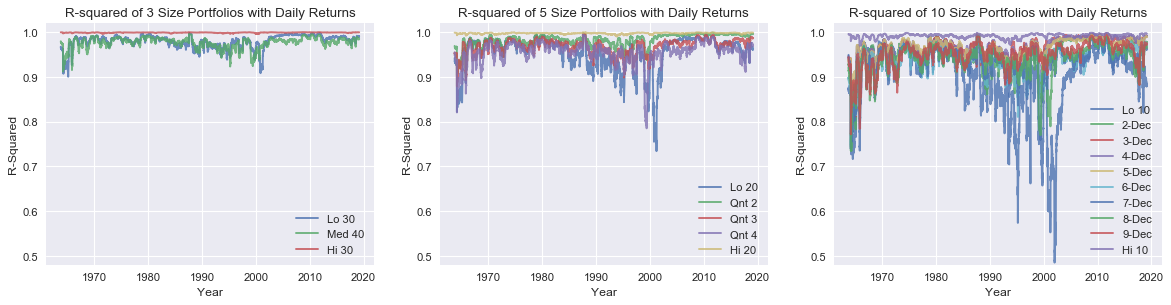

In [51]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.show()


In [ ]:
####################  2. Regression with Monthly Return   ###################################

In [120]:
pf_size_mm = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_monthly.csv')
ff5_mm = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_monthly.csv')

In [121]:
print(pf_size_mm.tail())

     Unnamed: 0   <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  \
666      201901 -99.99  10.35   12.28   8.02  10.16  10.74  12.33  11.18   
667      201902 -99.99   5.82    5.68   3.30   5.93   5.46   5.29   4.84   
668      201903 -99.99  -2.50   -1.41   1.75  -2.82  -2.42  -1.53   0.50   
669      201904 -99.99   2.49    4.28   4.24   1.75   2.87   4.69   3.82   
670      201905 -99.99  -7.50   -8.27  -6.58  -7.15  -8.94  -7.48  -7.00   

     Hi 20  Lo 10  2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  \
666   7.82  10.59   9.88  10.55  10.89  12.91  11.85  12.74  10.27  10.24   
667   3.24   5.33   6.33   5.71   5.26   4.63   5.84   6.29   3.99   5.16   
668   1.78  -2.98  -2.71  -2.16  -2.63  -2.31  -0.88  -0.82   1.30   0.49   
669   4.31   1.26   2.08   3.24   2.55   4.19   5.10   4.46   3.45   4.08   
670  -6.62  -6.47  -7.60  -7.86  -9.87  -8.10  -6.97  -8.58  -6.07  -6.16   

     Hi 10  
666   7.40  
667   2.89  
668   2.03  
669   4.35  
670  -6.70  


In [122]:
pf_size_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [123]:
pf_size_excess_mm=(pf_size_mm.iloc[:,1:pf_size_mm.shape[1]]).sub(ff5_mm.RF,axis=0)

In [124]:
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')
pf_size_excess_mm['YYMM'] = pd.to_datetime(pf_size_mm['YYMM'],yearfirst=True, format='%Y%m')

In [125]:
print(pf_size_excess_mm.tail())

       <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
666 -100.20  10.14   12.07   7.81   9.95  10.53  12.12  10.97   7.61  10.38   
667 -100.17   5.64    5.50   3.12   5.75   5.28   5.11   4.66   3.06   5.15   
668 -100.18  -2.69   -1.60   1.56  -3.01  -2.61  -1.72   0.31   1.59  -3.17   
669 -100.20   2.28    4.07   4.03   1.54   2.66   4.48   3.61   4.10   1.05   
670 -100.20  -7.71   -8.48  -6.79  -7.36  -9.15  -7.69  -7.21  -6.83  -6.68   

     2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10       YYMM  
666   9.67  10.34  10.68  12.70  11.64  12.53  10.06  10.03   7.19 2019-01-01  
667   6.15   5.53   5.08   4.45   5.66   6.11   3.81   4.98   2.71 2019-02-01  
668  -2.90  -2.35  -2.82  -2.50  -1.07  -1.01   1.11   0.30   1.84 2019-03-01  
669   1.87   3.03   2.34   3.98   4.89   4.25   3.24   3.87   4.14 2019-04-01  
670  -7.81  -8.07 -10.08  -8.31  -7.18  -8.79  -6.28  -6.37  -6.91 2019-05-01  


In [126]:
ff5_mm.index = ff5_mm['YYMM']
pf_size_excess_mm.index = pf_size_excess_mm['YYMM']
ff5_mm = ff5_mm.drop('YYMM', axis = 1)
ff5_mm = ff5_mm.drop('RF', axis = 1)

In [127]:
#use 10 year window (number of obs will be close to daily models with half-year window)
start_mm = ff5_mm.index[0]
end_mm = ff5_mm.index[ff5_mm.shape[0]-1]
n_month = end_mm - start_mm
print(ff5_mm.shape[0])
window_mm = 120
n_window_mm = ff5_mm.shape[0] - window_mm + 1
print(n_window_mm)
print(end_mm)

671
552
2019-05-01 00:00:00


In [128]:
print(window_mm)
window_nm_month = []
for i in range(n_window_mm):
    nm = ff5_mm.index[i+int(window_mm/2)]
    window_nm_month.append(nm)
print(len(window_nm_month))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

120
552
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [129]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_3_mm = pf_size_excess_mm.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf_mm = []
for i in range (3):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_3_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf_mm.append(reg.fit())
    

In [130]:
Rsquare_3_pf_mm = {}
for i in range(3):
    x = []
    for n in range(n_window_mm):  
        x.append(models_3_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_3_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [131]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_5_mm = pf_size_excess_mm.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf_mm = []
for i in range (5):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_5_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf_mm.append(reg.fit())

In [132]:
Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [133]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_10_mm = pf_size_excess_mm.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf_mm = []
for i in range (10):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_10_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf_mm.append(reg.fit())

In [134]:
Rsquare_10_pf_mm = {}
for i in range(10):
    x = []
    for n in range(n_window_mm):  
        x.append(models_10_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_10_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

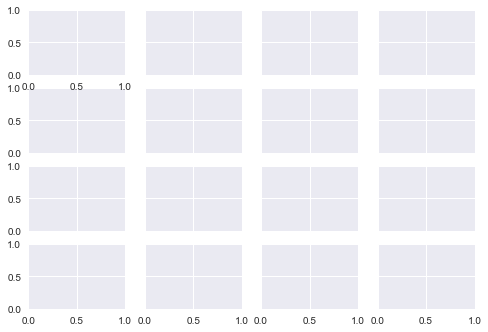

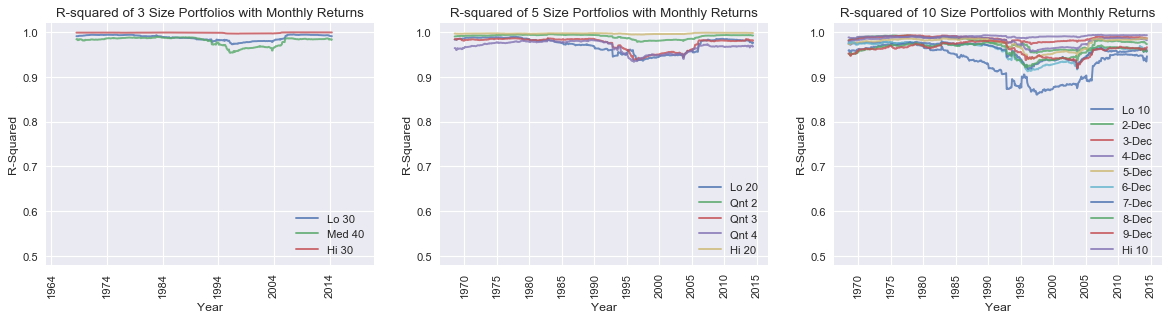

In [135]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

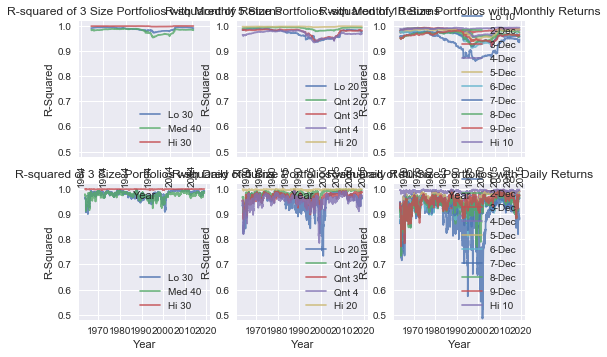

In [136]:
fig = plt.figure(figsize=(130, 80), dpi= 80, facecolor='w', edgecolor='k')

plt.subplots(2, 3, sharex=True, sharey=True)

plt.subplot(2, 3, 4)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 5)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 6)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

In [ ]:
####################  3. Factor Correlations with Monthly Return   ###################################

In [137]:
corr = ff5_mm.corr()

In [138]:
print(corr)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.276618 -0.254758 -0.228337 -0.386550
SMB     0.276618  1.000000 -0.068078 -0.347595 -0.105261
HML    -0.254758 -0.068078  1.000000  0.061226  0.692952
RMW    -0.228337 -0.347595  0.061226  1.000000 -0.037308
CMA    -0.386550 -0.105261  0.692952 -0.037308  1.000000


In [139]:
corr.iloc[1][4]

Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [140]:
correlation = []
for m in range(n_window_mm):
    t0 = ff5_mm.index[0+m]
    if ff5_mm.index[0+m+window_mm-1] < end_mm:
        t1 = ff5_mm.index[0+m+window_mm-1]
    else:
        t1 = end_mm
    correlation.append(ff5_mm[t0:t1].corr())
        

In [141]:
print(correlation[1])
correlation[0].iloc[4][1]

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.522292 -0.164799 -0.029840 -0.363053
SMB     0.522292  1.000000 -0.209512 -0.144585 -0.363920
HML    -0.164799 -0.209512  1.000000 -0.649084  0.771785
RMW    -0.029840 -0.144585 -0.649084  1.000000 -0.615301
CMA    -0.363053 -0.363920  0.771785 -0.615301  1.000000


-0.34243811368283755

In [142]:
Mrk_SMB = []
Mrk_HML = []
Mrk_RMW = []
Mrk_CMA = []
SMB_HML = []
SMB_RMW = []
SMB_CMA = []
HML_RMW = []
HML_CMA = []
RMW_CMA = []
for i in range(len(correlation)):
    Mrk_SMB.append(correlation[i].iloc[0][1])
    Mrk_HML.append(correlation[i].iloc[0][2])
    Mrk_RMW.append(correlation[i].iloc[0][3])
    Mrk_CMA.append(correlation[i].iloc[0][4])
    SMB_HML.append(correlation[i].iloc[1][2])
    SMB_RMW.append(correlation[i].iloc[1][3])
    SMB_CMA.append(correlation[i].iloc[1][4])
    HML_RMW.append(correlation[i].iloc[2][3])
    HML_CMA.append(correlation[i].iloc[2][4])
    RMW_CMA.append(correlation[i].iloc[3][4])
    
Mrk_SMB_Corr = pd.Series(Mrk_SMB,index = window_nm_month)
Mrk_HML_Corr = pd.Series(Mrk_HML,index = window_nm_month)  
Mrk_RMW_Corr = pd.Series(Mrk_RMW,index = window_nm_month)  
Mrk_CMA_Corr = pd.Series(Mrk_CMA,index = window_nm_month)  
SMB_HML_Corr = pd.Series(SMB_HML,index = window_nm_month)  
SMB_RMW_Corr = pd.Series(SMB_RMW,index = window_nm_month)  
SMB_CMA_Corr = pd.Series(SMB_CMA,index = window_nm_month)  
HML_RMW_Corr = pd.Series(HML_RMW,index = window_nm_month)  
HML_CMA_Corr = pd.Series(HML_CMA,index = window_nm_month)  
RMW_CMA_Corr = pd.Series(RMW_CMA,index = window_nm_month)  

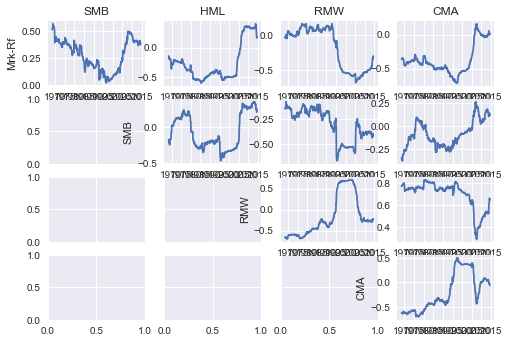

In [143]:
fig = plt.figure(figsize=(130, 80), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots(4, 4, sharex=True, sharey=True)

plt.subplot(4, 4, 1)
plt.plot(Mrk_SMB_Corr)
plt.title('SMB')
plt.ylabel('Mrk-Rf')

plt.subplot(4, 4, 2)
plt.plot(Mrk_HML_Corr)
plt.title('HML')

plt.subplot(4, 4, 3)
plt.plot(Mrk_RMW_Corr)
plt.title('RMW')

plt.subplot(4, 4, 4)
plt.plot(Mrk_CMA_Corr)
plt.title('CMA')

plt.subplot(4, 4, 6)
plt.plot(SMB_HML_Corr)
plt.ylabel('SMB')

plt.subplot(4, 4, 7)
plt.plot(SMB_RMW_Corr)


plt.subplot(4, 4, 8)
plt.plot(SMB_CMA_Corr)


plt.subplot(4, 4, 11)
plt.plot(HML_RMW_Corr)
plt.ylabel('RMW')

plt.subplot(4, 4, 12)
plt.plot(HML_CMA_Corr)

plt.subplot(4, 4, 16)
plt.plot(RMW_CMA_Corr)
plt.ylabel('CMA')

plt.show()

In [ ]:
####################  4. Factor Significance in Daily Return ###################################

In [31]:

lo_30_p = {}
Med_40_p = {}
Hi_30_p = {}

factor = ['Const', 'Mrk-Rf', 'SMB', 'HML', 'RMW', 'CMA']

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)):            
        x.append(models_3_pf[i].pvalues[j])
    lo_30_p[factor[j]] = pd.Series(x, index = window_nm)

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)-1, 2*int(len(models_3_pf)/3)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Med_40_p[factor[j]] = pd.Series(x, index=window_nm)
    
for j in range(6):
    x= []
    for i in range(2*int(len(models_3_pf)/3)-1, len(models_3_pf)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Hi_30_p[factor[j]] = pd.Series(x, index = window_nm)

lo_30_p_summary = pd.concat([lo_30_p[factor[1]],lo_30_p[factor[2]],lo_30_p[factor[3]],lo_30_p[factor[4]],lo_30_p[factor[5]]], axis=1)
Med_40_p_summary = pd.concat([Med_40_p[factor[1]],Med_40_p[factor[2]],Med_40_p[factor[3]],Med_40_p[factor[4]],Med_40_p[factor[5]]], axis=1)
Hi_30_p_summary = pd.concat([Hi_30_p[factor[1]],Hi_30_p[factor[2]],Hi_30_p[factor[3]],Hi_30_p[factor[4]],Hi_30_p[factor[5]]], axis=1)


In [34]:
lo_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[0]]
lo_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[1]]
lo_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[2]]
lo_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[3]]
lo_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[4]]

Med_40_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[0]]
Med_40_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[1]]
Med_40_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[2]]
Med_40_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[3]]
Med_40_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[4]]

Hi_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[0]]
Hi_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[1]]
Hi_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[2]]
Hi_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[3]]
Hi_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[4]]


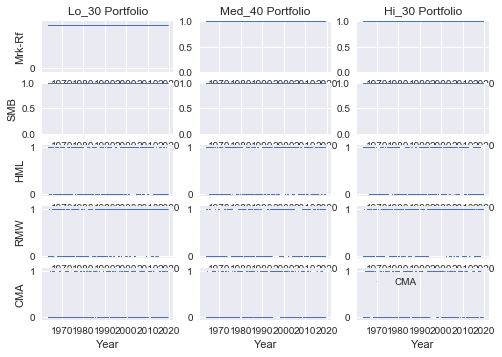

In [48]:
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots(5, 3, sharex=True, sharey=True)

plt.subplot(5, 3, 1)
plt.plot(lo_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5,label="Mrk",alpha=0.8)
plt.title('Lo_30 Portfolio')
plt.ylabel('Mrk-Rf')
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1, step=1))

plt.subplot(5, 3, 2)
plt.plot(Med_40_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5, label="Mrk",alpha=0.8)
plt.title('Med_40 Portfolio')
plt.ylim([0,1])
plt.subplot(5, 3, 3)
plt.plot(Hi_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5, label="Mrk",alpha=0.8)
plt.title('Hi_30 Portfolio')
plt.ylim([0,1])

plt.subplot(5, 3, 4)
plt.plot(lo_30_p_summary['SMB Ind'],'o',markersize = 0.5,label="SMB",alpha=0.8)
plt.ylabel('SMB')
plt.ylim([0,1])
plt.subplot(5, 3, 5)
plt.plot(Med_40_p_summary['SMB Ind'],'o',markersize = 0.5, label="SMB",alpha=0.8)
plt.ylim([0,1])
plt.subplot(5, 3, 6)
plt.plot(Hi_30_p_summary['SMB Ind'],'o',markersize = 0.5, label="SMB",alpha=0.8)
plt.ylim([0,1])

plt.subplot(5, 3, 7)
plt.plot(lo_30_p_summary['HML Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylabel('HML')
plt.subplot(5, 3, 8)
plt.plot(Med_40_p_summary['HML Ind'],'o',markersize = 0.5, label="HML",alpha=0.8)
plt.subplot(5, 3, 9)
plt.plot(Hi_30_p_summary['HML Ind'],'o',markersize = 0.5, label="HML",alpha=0.8)

plt.subplot(5, 3, 10)
plt.plot(lo_30_p_summary['RMW Ind'],'o',markersize = 0.5,label="RMW",alpha=0.8)
plt.ylabel('RMW')
plt.subplot(5, 3, 11)
plt.plot(Med_40_p_summary['RMW Ind'],'o',markersize = 0.5, label="RMW",alpha=0.8)
plt.subplot(5, 3, 12)
plt.plot(Hi_30_p_summary['RMW Ind'],'o',markersize = 0.5, label="RMW",alpha=0.8)

plt.subplot(5, 3, 13)
plt.plot(lo_30_p_summary['CMA Ind'],'o',markersize = 0.5,label="CMA",alpha=0.8)
plt.ylabel('CMA')
plt.xlabel('Year')
plt.subplot(5, 3, 14)
plt.plot(Med_40_p_summary['CMA Ind'],'o',markersize = 0.5, label="CMA",alpha=0.8)
plt.xlabel('Year')
plt.subplot(5, 3, 15)
plt.plot(Hi_30_p_summary['CMA Ind'],'o',markersize = 0.5, label="CMA",alpha=0.8)
plt.xlabel('Year')


plt.legend(loc='upper left')
plt.show()

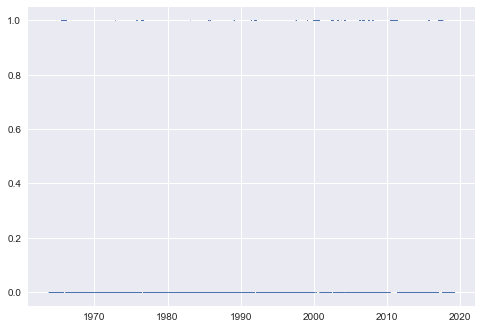

0.08458781362007169

In [156]:
#when all 5 factors are significant
all_sign_lo30 = lo_30_p_summary.iloc[:,5:10].product(axis = 1)
plt.plot(all_sign_lo30,'o',markersize = 0.5) 
plt.show()
all_sign_lo30.sum(axis=0)/len(all_sign_lo30)

In [58]:
signperc_lo30 = lo_30_p_summary.iloc[:,5:10].sum(axis = 0)/len(lo_30_p_summary)
signperc_Med40 = Med_40_p_summary.iloc[:,5:10].sum(axis = 0)/len(Med_40_p_summary)
signperc_Hi30 = Hi_30_p_summary.iloc[:,5:10].sum(axis = 0)/len(Hi_30_p_summary)

In [115]:
signperc_summary = pd.concat([signperc_lo30,signperc_Med40,signperc_Hi30], axis=1)
signperc_summary.columns = ['Lo 30', 'Med 40', 'Hi 30']

In [110]:
print(signperc_lo30)
print(signperc_Med40)
print(signperc_Hi30)
print(signperc_summary)

Mrk-Rf Ind    1.000000
SMB Ind       1.000000
HML Ind       0.426738
RMW Ind       0.671828
CMA Ind       0.252832
dtype: float64
Mrk-Rf Ind    1.000000
SMB Ind       1.000000
HML Ind       0.526237
RMW Ind       0.398351
CMA Ind       0.296201
dtype: float64
Mrk-Rf Ind    1.000000
SMB Ind       1.000000
HML Ind       0.518136
RMW Ind       0.635842
CMA Ind       0.345018
dtype: float64
               Lo 30    Med 40     Hi 30
Mrk-Rf Ind  1.000000  1.000000  1.000000
SMB Ind     1.000000  1.000000  1.000000
HML Ind     0.426738  0.526237  0.518136
RMW Ind     0.671828  0.398351  0.635842
CMA Ind     0.252832  0.296201  0.345018


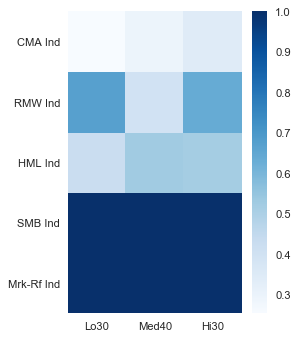

In [111]:
plt.close()
fig=plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.pcolor(signperc_summary, cmap=plt.cm.Blues)
plt.yticks(np.arange(0.5, len(signperc_lo30), 1), signperc_lo30.index)
plt.xticks(np.arange(0.5, 3, 1), ['Lo30', 'Med40', 'Hi30'])
plt.colorbar()
plt.show()

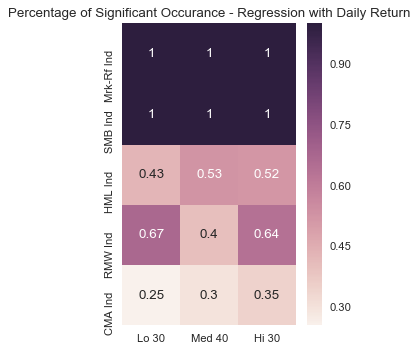

In [144]:
plt.close()
plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(signperc_summary,annot=True)
plt.title('Percentage of Significant Occurance - Regression with Daily Return')
plt.show()

In [ ]:
####################  5. Factor Significance in Daily Monthly Regressions   ###################################

In [146]:
lo_30_p_mm = {}
Med_40_p_mm = {}
Hi_30_p_mm = {}

factor = ['Const', 'Mrk-Rf', 'SMB', 'HML', 'RMW', 'CMA']

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf_mm)/3)):            
        x.append(models_3_pf_mm[i].pvalues[j])
    lo_30_p_mm[factor[j]] = pd.Series(x, index = window_nm_month)

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf_mm)/3)-1, 2*int(len(models_3_pf_mm)/3)-1):            
        x.append(models_3_pf_mm[i].pvalues[j])
    Med_40_p_mm[factor[j]] = pd.Series(x, index=window_nm_month)
    
for j in range(6):
    x= []
    for i in range(2*int(len(models_3_pf_mm)/3)-1, len(models_3_pf_mm)-1):            
        x.append(models_3_pf_mm[i].pvalues[j])
    Hi_30_p_mm[factor[j]] = pd.Series(x, index = window_nm_month)

lo_30_p_mm_summary = pd.concat([lo_30_p_mm[factor[1]],lo_30_p_mm[factor[2]],lo_30_p_mm[factor[3]],lo_30_p_mm[factor[4]],lo_30_p_mm[factor[5]]], axis=1)
Med_40_p_mm_summary = pd.concat([Med_40_p_mm[factor[1]],Med_40_p_mm[factor[2]],Med_40_p_mm[factor[3]],Med_40_p_mm[factor[4]],Med_40_p_mm[factor[5]]], axis=1)
Hi_30_p_mm_summary = pd.concat([Hi_30_p_mm[factor[1]],Hi_30_p_mm[factor[2]],Hi_30_p_mm[factor[3]],Hi_30_p_mm[factor[4]],Hi_30_p_mm[factor[5]]], axis=1)


In [147]:
lo_30_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[0]]
lo_30_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[1]]
lo_30_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[2]]
lo_30_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[3]]
lo_30_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[4]]

Med_40_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[0]]
Med_40_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[1]]
Med_40_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[2]]
Med_40_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[3]]
Med_40_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[4]]

Hi_30_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[0]]
Hi_30_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[1]]
Hi_30_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[2]]
Hi_30_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[3]]
Hi_30_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[4]]


In [148]:
signperc_lo30_mm = lo_30_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(lo_30_p_mm_summary)
signperc_Med40_mm = Med_40_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(Med_40_p_mm_summary)
signperc_Hi30_mm = Hi_30_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(Hi_30_p_mm_summary)

In [149]:
signperc_mm_summary = pd.concat([signperc_lo30_mm,signperc_Med40_mm,signperc_Hi30_mm], axis=1)
signperc_mm_summary.columns = ['Lo 30', 'Med 40', 'Hi 30']

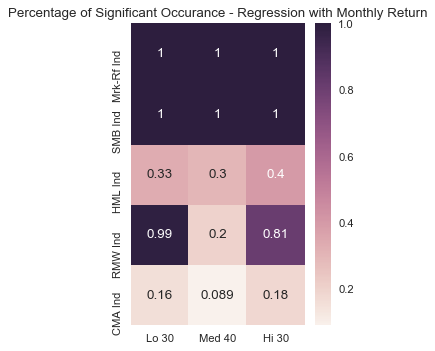

In [150]:
plt.close()
plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(signperc_mm_summary,annot=True)
plt.title('Percentage of Significant Occurance - Regression with Monthly Return')
plt.show()